# 04.01 회귀분석 예제

    - 보스턴 집값 데이터
    - 당뇨병 진행도 데이터
    - 캘리포니아 집값 데이터
    - 가상 데이터 : make_regression

### 1) 보스턴 집값 예측

In [1]:
from sklearn.datasets import load_boston

boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [11]:
# 독립변수, 종속변수 행렬 생성

dfx = pd.DataFrame(boston.data, columns = boston.feature_names)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])

# 독립변수, 종속변수 프레임을 하나로 결합 -> 열방향으로 결합 (axis=1)

df = pd.concat([dfx,dfy],axis=1)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


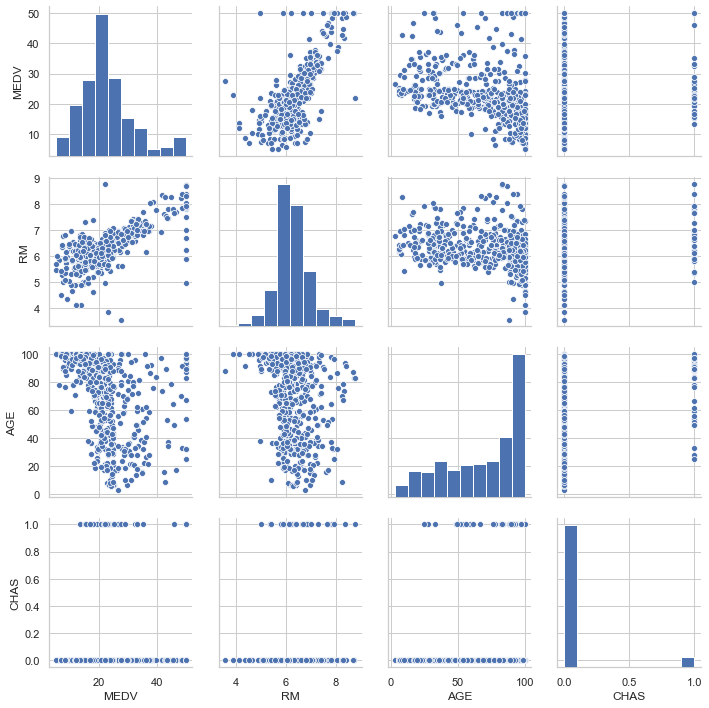

In [15]:
# 종속변수, 독립변수 간 관계 1차 파악을 위해 산점도 생성

sns.pairplot(df[["MEDV", "RM", "AGE", "CHAS"]])

# [산점도를 통한 발견]
# 1. 종속변수와 독립변수(RM)은 선형 상관관계가 의심됨을 확인
# 2. chas가 1이면 rm값이 보통 높게 시작되는 것을 확인

### 2) 당뇨병 진행도 예측

In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


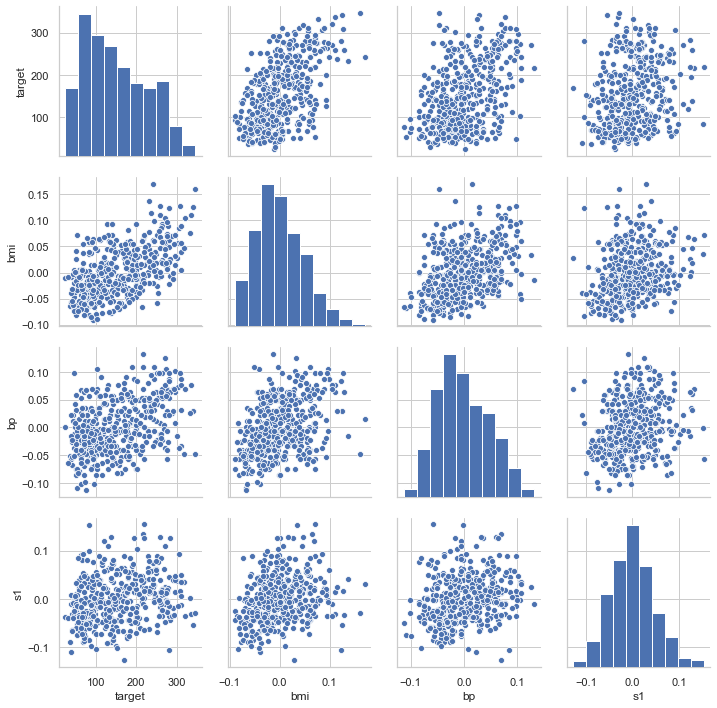

In [17]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])

# [산점도를 통한 발견]
# target(종속변수)와 독립변수(bmi, bp)가 선형상관관계임을 확인
# 독립변수(bmi,bp)간 선형상관관계 확인 ===>>> 다중공선성!!

### 3) 연습문제 - 캘리포니아 주택 데이터

In [25]:
from sklearn.datasets import fetch_california_housing

house = fetch_california_housing()
df_h = pd.DataFrame(house.data, columns=house.feature_names)
df_h['target'] = house.target
df_h

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


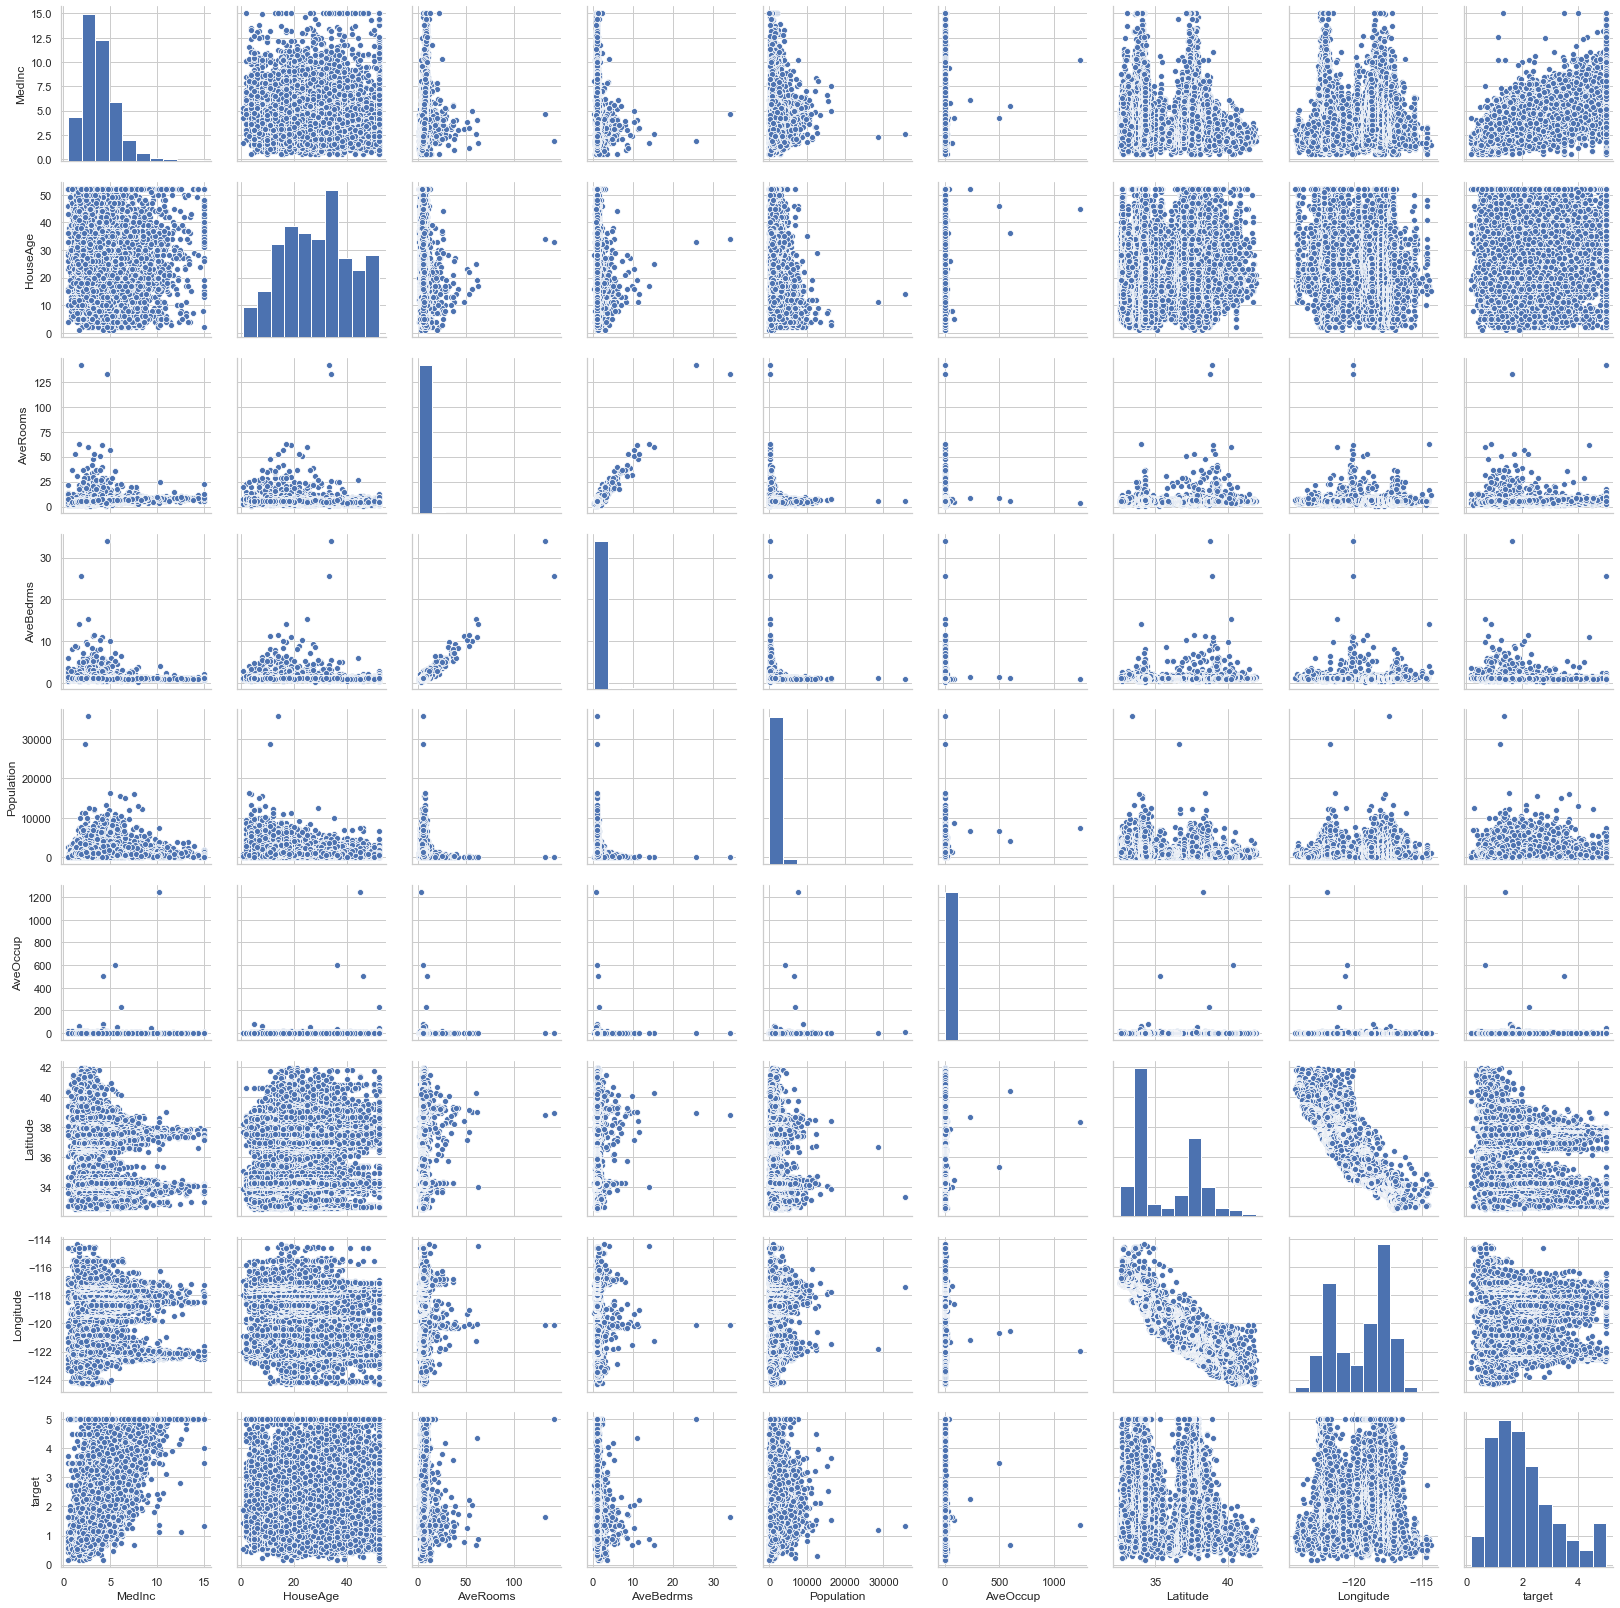

In [26]:
sns.pairplot(df_h)

In [ ]:
# [산점도를 통한 발견]
# 1. target과 선형상관관계가 의심되는 독립변수는 MedInc 뿐
# 2. Averooms - Avebedrooms 간 상관관계. 즉, 독립변수 간 상관관계로 다중공선성 의심
# 3. Latitude - Longitude 간 상관관계.

### 4) 가상 데이터 _ make_regression

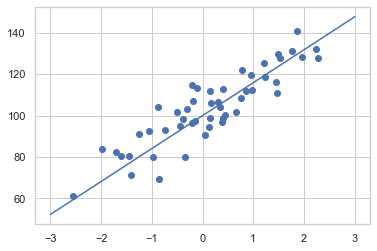

In [37]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

xx = np.linspace(-3,3,100)
line = w*xx + 100
plt.scatter(X,y)
plt.plot(xx,line)

### 5) make_regression 함수 구현

```


make_regression과 같은 기능을 하는 함수 make_regression2를 만들어라. 
단 make_regression2는 coef=True, n_features=1 라고 가정한다. 

즉 항상 가중치 계수를 반환하고 1차원 독립변수만 생성할 수 있다. 
따라서 make_regression2는 다음과 같은 인수만 가진다.


n_samples
bias
noise
random_state


따라서 함수 사용법은 다음과 같아야 한다.
X, y, w = make_regression2(n_samples, bias, noise, random_state)
```

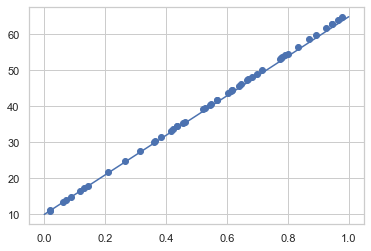

In [184]:
def make_reg2(n_samples, bias, noise, random_state):
    
    # 1. 독립변수 데이터 행렬 X를 생성
    np.random.seed(random_state)
    X = np.random.rand(n_samples,1)
    
    # 2. 종속변수와 독립변수를 연결하는 가중치 벡터 w를 무작위로 만듬
    np.random.seed(random_state)
    w = 100*np.random.rand(1)
    
    # 3. X와 w를 내적 -> y절편 b값을 더해 독립변수와 완전 선형인 벡터 y_0를 만듬
    y_0 = X*w + bias
    
    # 4. 기댓값이 0이고, 표준편차가 noise인 정규분포를 이용하여 잡음 epsilon을 만듬
    np.random.seed(random_state)
    e = np.random.rand(n_samples).reshape(-1,1)
    
    # 5. 독립변수와 완전선형인 종속변수 벡터 y_0에 잡음 epsilon을 더해 종속변수 데이터 y를 만듬
    y = y_0 + e
    
    xx = np.linspace(0,1,100)
    line = w*xx + bias
    plt.scatter(X,y)
    plt.plot(xx,line)
    
    return

make_reg2(50,10,1,0)

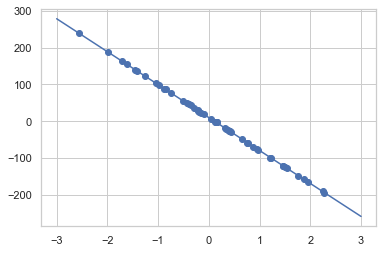

In [188]:
# 보다 나은 코드
# np.random.normal(size= ,scale= )을 활용해 난수 생성 -> 범위가 -3에서 3사이에 들어옴

def make_regression2(n_samples, bias, noise, random_state):
    
    np.random.seed(random_state)
    X = np.random.normal(size=n_samples)
    w = 100*np.random.normal(size=1)[0]
    y0 = X*w + bias
    e = np.random.normal(scale=noise, size=n_samples)
    y = y0 + e
    
    xx = np.linspace(-3,3,100)
    line = w*xx + bias
    plt.scatter(X,y)
    plt.plot(xx,line)
    
    return
    
make_regression2(50,10,1,0)